<a href="https://colab.research.google.com/github/TienLungSun/AI-Lecture-notes/blob/main/3.%20TimeFrequencyRepresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython import display
import matplotlib.gridspec as gridspec

In [39]:
#load data file to colab
from google.colab import files
uploaded = files.upload()

Saving Taiguo_JointDetection.csv to Taiguo_JointDetection (1).csv


In [40]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

Taiguo_JointDetection.csv


In [41]:
import pandas as pd
df=pd.read_csv(fname)

In [42]:
df.head(3)

,frameNo,sid,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
0,1,1,663.438354,176.039490,669.179504,170.277161,658.414856,169.556870,677.073608,168.116302,648.367798,163.074280,688.555908,200.529343,631.861938,196.927887,693.579468,251.669922,621.097229,250.949615,691.426514,301.369904,618.226685,301.369904,674.203003,304.251068,639.756042,307.852509,669.179504,387.804657,641.908997,389.965546,665.591248,457.672760,644.779541,455.511902
1,1,2,497.138031,175.129608,502.879913,170.805801,493.549347,170.805801,508.621796,178.012146,486.371979,174.408966,517.952332,216.205811,474.170471,213.323257,522.976501,263.047089,466.275391,263.047089,521.541016,307.726501,463.404419,304.123322,510.057281,304.843933,479.912354,304.843933,508.621796,371.863007,480.630066,370.421753,533.742554,386.996368,482.783295,386.996368
2,1,3,291.803864,135.907669,298.244507,130.866974,288.225708,129.426758,308.978943,137.347870,281.069397,133.747360,318.282135,182.714157,271.050598,182.714157,324.007172,235.281448,264.609955,235.281448,321.144653,286.408569,261.031799,284.968353,306.116425,288.568848,275.344391,288.568848,301.822662,370.660217,276.775635,370.660217,300.391418,446.990784,281.069397,446.270721


In [43]:
df.columns

Index(['frameNo', 'sid', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5',
       'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10',
       'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15',
       'x16', 'y16', 'x17', 'y17'],
      dtype='object')

Generate time-frequency representation for different sid and joints

5,6:L/R shoulder

9,10: L/R wirst

13,14: L/R knee

For more joint indices: https://learnopencv.com/human-pose-estimation-using-keypoint-rcnn-in-pytorch/?ck_subscriber_id=297191382



In [44]:
sid = 1
jointLst = [5, 6, 9, 10, 13, 14]

In [45]:
df_subject = df[df['sid']==sid] #注意看一下 df.columns 的欄位名稱

In [46]:
df_subject.head(3)

,frameNo,sid,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
0,1,1,663.438354,176.039490,669.179504,170.277161,658.414856,169.556870,677.073608,168.116302,648.367798,163.074280,688.555908,200.529343,631.861938,196.927887,693.579468,251.669922,621.097229,250.949615,691.426514,301.369904,618.226685,301.369904,674.203003,304.251068,639.756042,307.852509,669.179504,387.804657,641.908997,389.965546,665.591248,457.672760,644.779541,455.511902
9,2,1,662.478699,175.904449,669.663940,170.862228,657.448975,169.421585,676.849243,167.260620,648.826660,162.938705,688.345703,199.674988,631.581970,198.234360,693.375366,250.817688,620.804077,249.377045,690.501282,299.799408,617.929932,299.799408,673.975159,306.282288,640.204285,307.002594,668.945435,387.678406,641.641357,388.398712,665.352783,457.549377,645.234009,456.108734
18,3,1,662.366699,175.856171,668.846375,170.813263,657.327026,169.372421,676.046021,167.931595,648.687439,163.609100,688.285400,200.350311,631.408325,198.189056,693.325134,251.499847,620.608887,250.058990,689.725281,300.488098,617.729004,300.488098,673.886108,306.971863,640.047852,307.692261,668.846375,387.658417,641.487793,389.099243,665.246582,457.538757,645.087646,456.097961


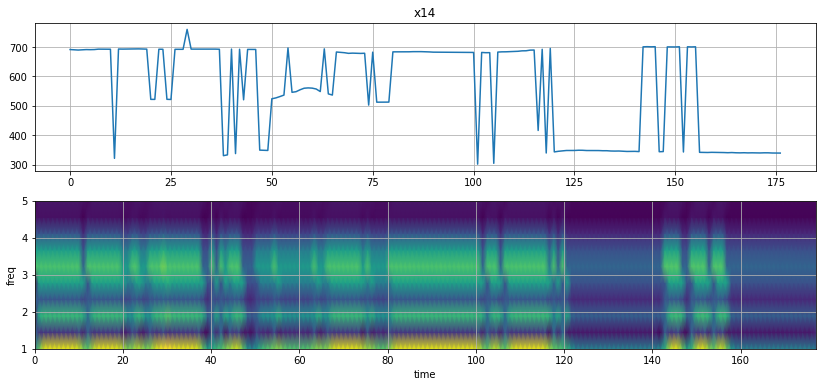

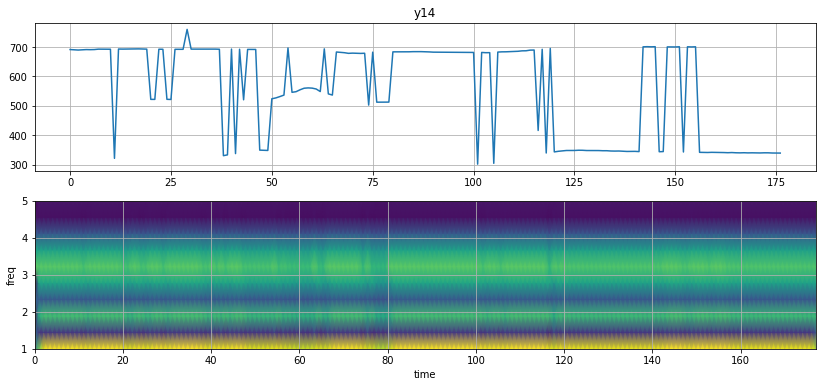

In [60]:
fnamePrefix = fname.rsplit(".", 1)[0] #get pre-fix part of fname 
for jointIdx in jointLst:
  display.clear_output(wait=True)

  #for each joint, we plot x, y 
  outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.3) #sub-figures = 2rows x 1 columns
  for idx, joint in enumerate(['x'+str(jointIdx), 'y'+str(jointIdx)]):
    df = df_subject[joint]
    time_series = np.array(df.values)
    length = time_series.shape[0]

    #time line data pts
    t, dt = np.linspace(0, length, length, retstep=True)

    #freq.domain data pts
    freq = np.linspace(1, 5, 10) #consider 10 freq between 1~5

    w = 6.
    fs = 1/dt
    widths = w*fs / (2*freq*np.pi)

    cwtm = signal.cwt(time_series, signal.morlet2, widths, w=w)
    
    #each sub-figure contains 2rows x 1columns subplots
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[idx],wspace=0.1, hspace=0.2)

    ax = plt.Subplot(fig, inner[0])
    fig=plt.figure(figsize=(14, 6))
    fig.add_subplot(2, 1, 1) 
    plt.title(joint)
    plt.plot(x)
    plt.grid()

    ax = plt.Subplot(fig, inner[1])
    fig.add_subplot(2, 1, 2) 
    plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("freq")
    plt.show()
  fname1 = fnamePrefix + "_" + str(jointIdx) + ".jpg"
  fig.savefig(fname1)
  plt.show()                     
  plt.pause(0.1)